<a href="https://colab.research.google.com/github/andregll/StockPredictionRegression/blob/master/Week3HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

!pip install yfinance upgrade no cache dir
yf.pdr_override()



from google.colab import drive



from sklearn.linear_model  import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics

  ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [0]:
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive/Week3"


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Week3


IMPORT DATA

In [0]:
df_full = pdr.get_data_yahoo("GE", start="2018-01-01").reset_index()
df_full.to_csv('output/GE.csv',index=False)

[*********************100%***********************]  1 of 1 downloaded


In [0]:
df_full.shape

(425, 7)

In [0]:
df_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.903847,17.298077,16.855770,17.288462,16.759356,80673100
1,2018-01-03,17.596153,17.634615,17.336538,17.451923,16.917818,84731100
2,2018-01-04,17.673077,17.903847,17.596153,17.817308,17.272022,85856600
3,2018-01-05,18.134615,18.144230,17.788462,17.826923,17.281342,83074800
4,2018-01-08,17.951923,17.980770,17.403847,17.576923,17.038992,85381500


In [0]:
df_full.describe()

,Open,High,Low,Close,Adj Close,Volume
count,425.000000,425.000000,425.000000,425.000000,425.000000,4.250000e+02
mean,11.283268,11.448550,11.101181,11.260252,11.130271,8.778346e+07
std,2.467347,2.465387,2.449861,2.448415,2.311897,5.414886e+07
min,6.576923,6.759615,6.403846,6.451923,6.429700,2.217560e+07
25%,9.510000,9.711538,9.320000,9.560000,9.550808,5.174820e+07
50%,10.790000,10.900000,10.530000,10.650000,10.638479,7.221170e+07
75%,13.182693,13.355769,13.038462,13.153846,12.955078,1.060504e+08
max,18.490385,18.644230,18.269230,18.288462,17.728752,4.010487e+08


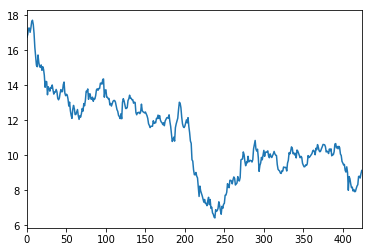

In [0]:
df_full["Adj Close"].plot()

PREPROCESSING


In [0]:
df_full.set_index("Date", inplace=True)


In [0]:
window_size = 32
num_samples=len(df_full)-window_size

indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = df_full['Adj Close'].values[indices]
x = data[:,:-1]
y = data[:,-1]






SPLITTING THE DATA BETWEEN TEST AND TRAIN

In [0]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [0]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [0]:
x_train.shape


(314, 32)

MODELING

In [0]:
 #Help Functions
  def get_performance (model_pred):\n",
          #Function returns standard performance metrics\n",
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  \n",
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  \n",
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))\n",
        
  def get_plot (model_pred):\n",
  plt.scatter(model_pred, y_test, color=\"gray\")\n",
      plt.plot(y_test, y_test, color='red', linewidth=2)"
